<a href="https://colab.research.google.com/github/ilman79/predict_salary_Indonesia/blob/main/Predict_salary_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gifariilman","key":"5c2fca0d1e6e17444d289ca2575e590e"}'}

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d adityakadiwal/water-potability

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 52.5MB/s]


In [5]:
!unzip water-potability.zip


Archive:  water-potability.zip
  inflating: water_potability.csv    


#Gethring Data

In [6]:
import pandas as pd

In [7]:
dataset = pd.read_csv("water_potability.csv")
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Cleaning Data

> **Import Libarary**



In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
from numpy import NaN
dataset.loc[dataset[['ph', 'Sulfate','Trihalomethanes']].isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1



`Dikarenakan pada variabel **ph**,**Sulfate**, dan **Trihalomethanes** masing-masing memiliki dampak pada pengunaan air dan kelayakan air yang akan kita konsumsi maka dari itu, ketiga variabel tersebut kita isi nilai NaNnya dengan rata-rata pada variabel masing-masing.`











> **Mengisi nilai NaN dengan rata-rata**



In [29]:
dataset.ph.fillna(value=dataset.ph.mean(), inplace=True)
dataset.Sulfate.fillna(value=dataset.Sulfate.mean(), inplace=True)
dataset.Trihalomethanes.fillna(value=dataset.Trihalomethanes.mean(), inplace=True)

In [30]:
dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

`Setelah kita inputkan semua nilai NaN ph dengan rata-rata maka hasilnya nilai NaN adalah 0`

> **Mengecek adanya outlier pada data**





In [32]:
Q1 = (dataset).quantile(0.25)
Q3 = (dataset).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = dataset < maximum
kondisi_more_than = dataset > minimum

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
3271,True,True,False,True,True,True,True,True,True,True
3272,True,True,True,True,True,True,True,True,True,True
3273,True,True,True,True,True,True,True,True,True,True
3274,True,True,True,True,True,True,True,True,True,True


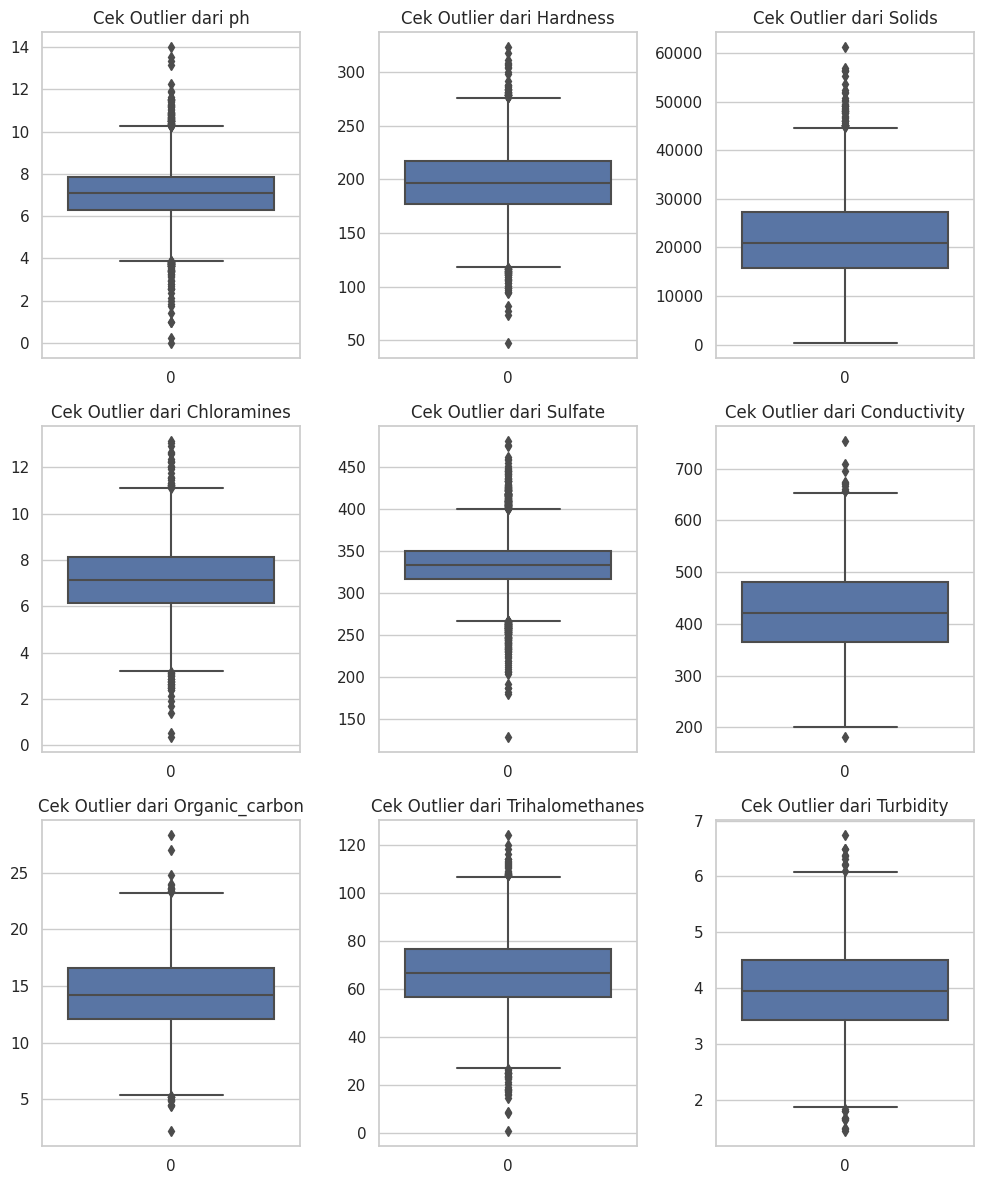

In [43]:
# Menghitung berapa banyak variabel yang akan divisualisasikan dalam satu baris
num_columns = len(dataset.columns)-1

# Menghitung berapa banyak kolom yang akan digunakan
num_cols_per_row = 3  # Anda dapat mengganti jumlah kolom per baris sesuai keinginan

# Menghitung berapa banyak baris yang diperlukan
num_rows = int(np.ceil(num_columns / num_cols_per_row))

# Membuat susunan subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(10, 4*num_rows))

# Melooping setiap variabel dan membuat boxplot
for i, column in enumerate(dataset.columns[:-1]):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    sns.boxplot(data=dataset[column], ax=axes[row, col])
    axes[row, col].set_title(f'Cek Outlier dari {column}')

# Mengatur tata letak subplot agar rapi
plt.tight_layout()
plt.show()


`Dilihat dari hasil diagram boxplot, banyak yang keluar dari outlier tetapi kita lihat lagi dari data yang kita punya yaitu untuk mengecek kadar kelayakan dari suatu air yaitu kita melihat air dengan kandungan tersebut layak digunakan atau tidak walaupun tidak berada pada rata-rata.`





> **Mengecek Duplikasi Data**



In [46]:
dataset.duplicated().sum()

0

`Pada dataset tidak ada data yang duplikat sehingga data sudah bisa dianalisis ketahap selanjutnya.`

# EDA

# Data Preperation